# HISTOGRAMA Y ECUALIZACIÓN<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [2]:
import numpy as np
import cv2
from  cv2 import imread
import matplotlib.pyplot as plt

In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))


def imhist(X):
  N,M = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()


In [4]:
def otraforma(img):
   img_shape = img.shape
   height = img_shape[0]
   width = img_shape[1]
   for row in range(width):
      for column in range(height):
           print (img[column][row])

In [6]:
# equalizacion que fuerza al histograma de salida ser uniforme
def hist_forceuni(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min())) 

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int64(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y


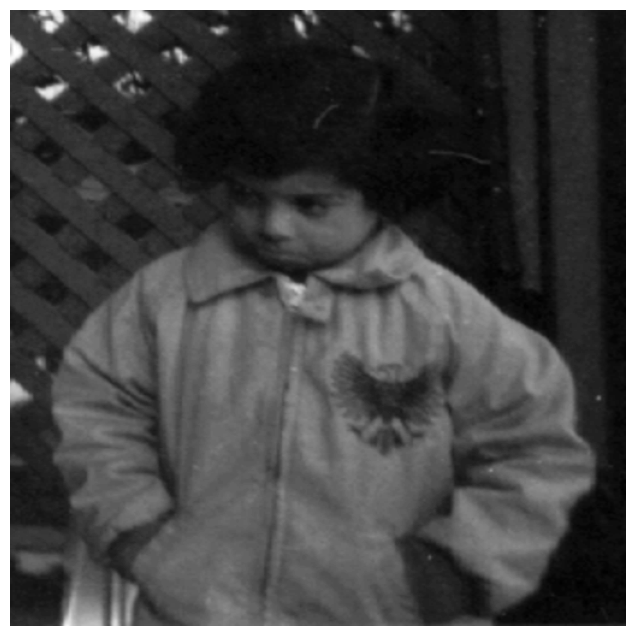

size =  (512, 512)
max  =  224
min  =  74


In [7]:
X0 = imread('pout.png',0)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X0,cmap='gray')
plt.show()
howis(X0)

# Otra forma

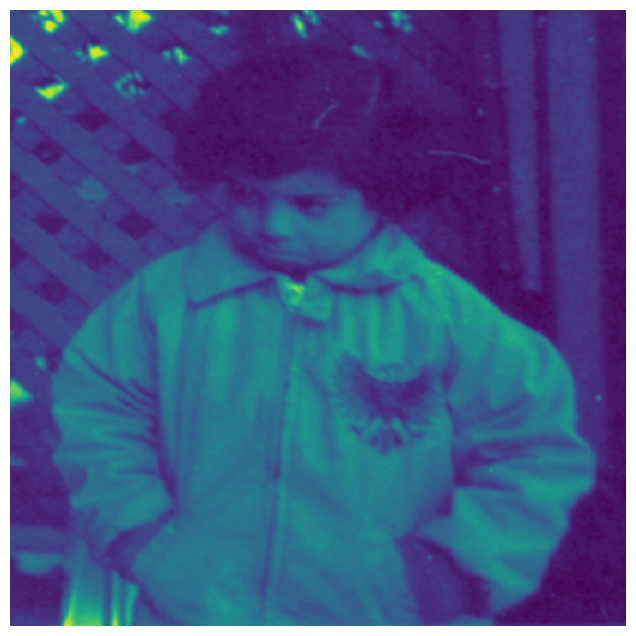

size =  (512, 512)
max  =  224
min  =  74
107
107
109
109
107
106
106
105
105
105
106
108
107
107
108
108
106
106
109
115
130
156
180
199
209
211
208
204
199
196
195
191
189
190
193
196
200
208
214
219
221
221
218
210
195
173
149
129
116
109
104
102
101
101
100
99
100
101
101
102
104
105
103
103
103
101
101
102
104
105
104
103
103
103
103
102
101
101
103
108
108
101
95
93
93
92
90
89
89
89
89
89
91
94
94
92
92
90
88
88
91
96
98
99
98
98
98
99
100
101
102
102
102
102
104
107
107
107
106
106
106
105
105
106
105
103
102
103
102
102
102
101
99
94
90
88
89
91
90
88
87
87
87
89
92
95
97
97
93
90
87
87
87
87
87
85
89
95
100
105
103
103
102
102
101
101
101
102
102
103
103
102
100
99
100
101
102
102
102
102
102
103
103
103
103
102
102
100
99
94
90
87
87
86
86
89
89
87
88
90
89
87
88
89
87
87
87
87
87
86
86
86
86
88
91
94
98
104
107
108
107
105
105
105
105
105
105
106
105
104
102
102
103
103
102
102
102
104
105
104
102
103
103
102
102
101
96
93
94
92
89
88
87
88
89
89
89
87
89
90
89
87
88
90
92


In [8]:
X0 = imread('pout.png',0)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X0)
plt.show()
howis(X0)
otraforma(X0)


In [9]:
hist_forceuni(X0)

array([[136, 134, 140, ...,  34,  34,  34],
       [135, 135, 140, ...,  34,  37,  37],
       [141, 137, 131, ...,  40,  48,  48],
       ...,
       [107, 107,  96, ...,  42,  56,  56],
       [113, 113, 107, ...,  76,  77,  77],
       [113, 113, 107, ...,  95,  96,  97]], dtype=uint8)

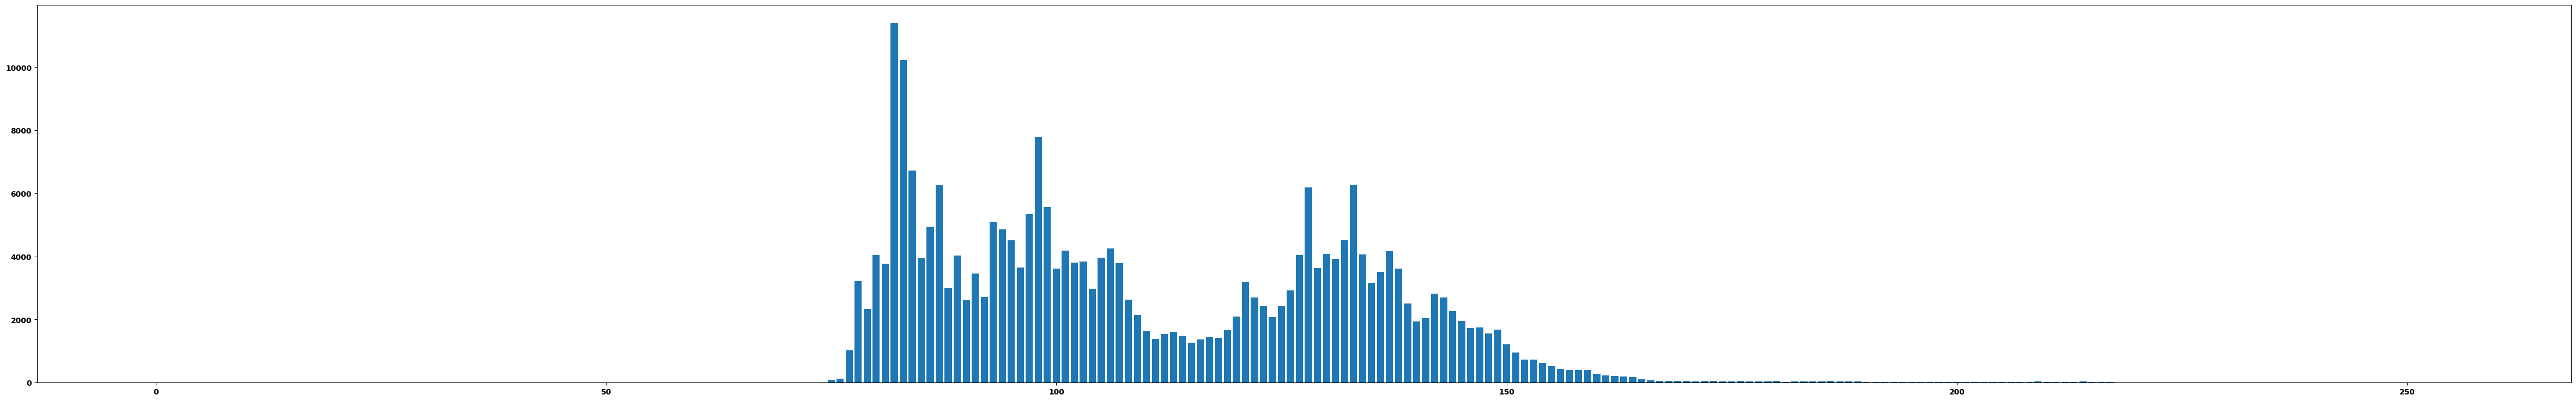

In [10]:
imhist(X0)

size =  (512, 512)
max  =  255
min  =  0


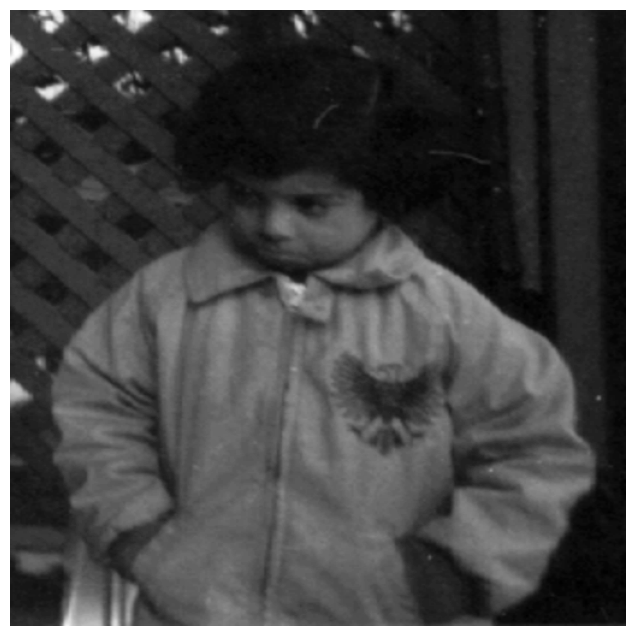

In [11]:
X1 = X0.copy()
X1 = 255 * ((X1 - X1.min()) / (X1.max() - X1.min()))
X1 = X1.astype(np.uint8)
howis(X1)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X1,cmap='gray')

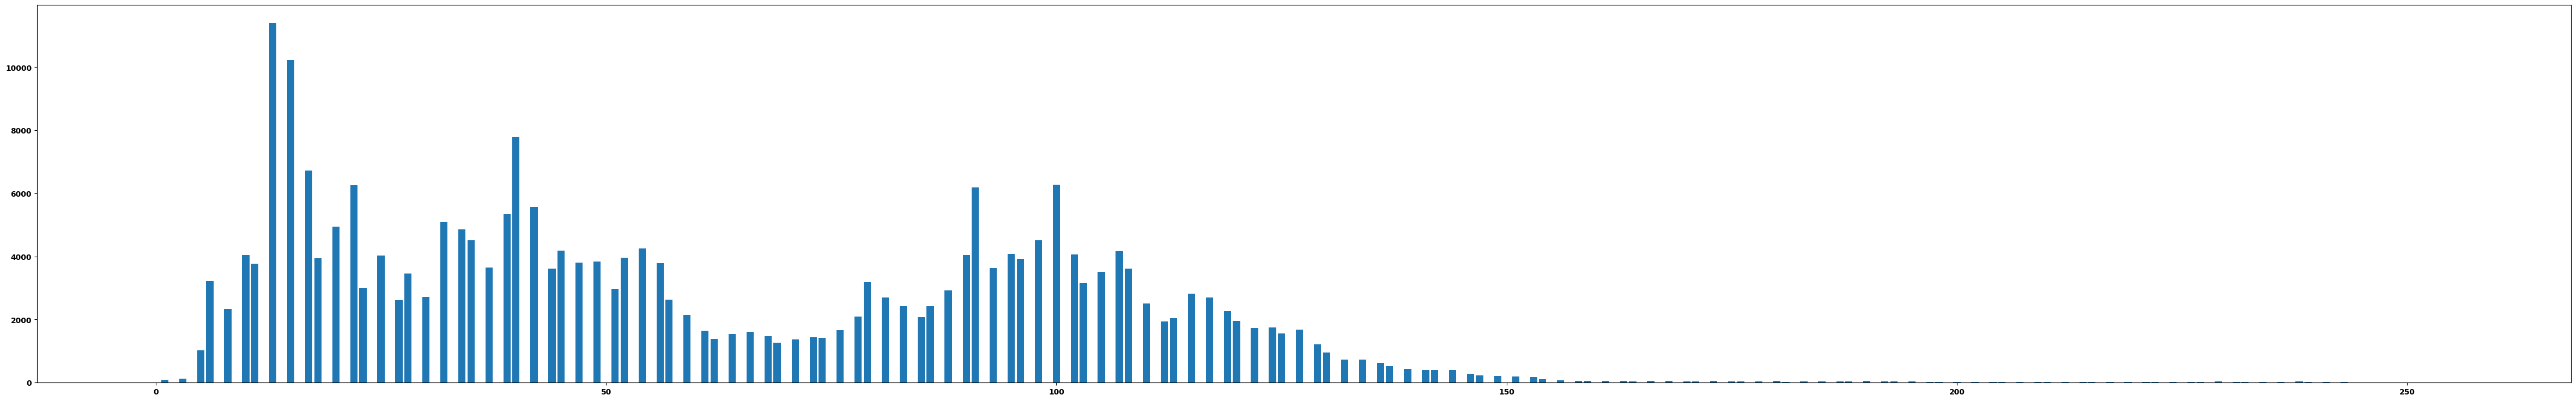

In [12]:
imhist(X1)

size =  (512, 512)
max  =  255
min  =  0


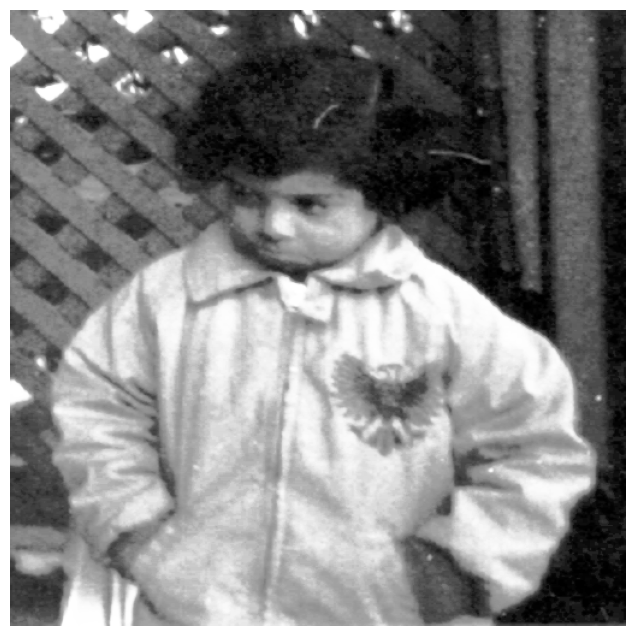

In [13]:
X2 = hist_forceuni(X0)
howis(X2)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X2,cmap='gray')

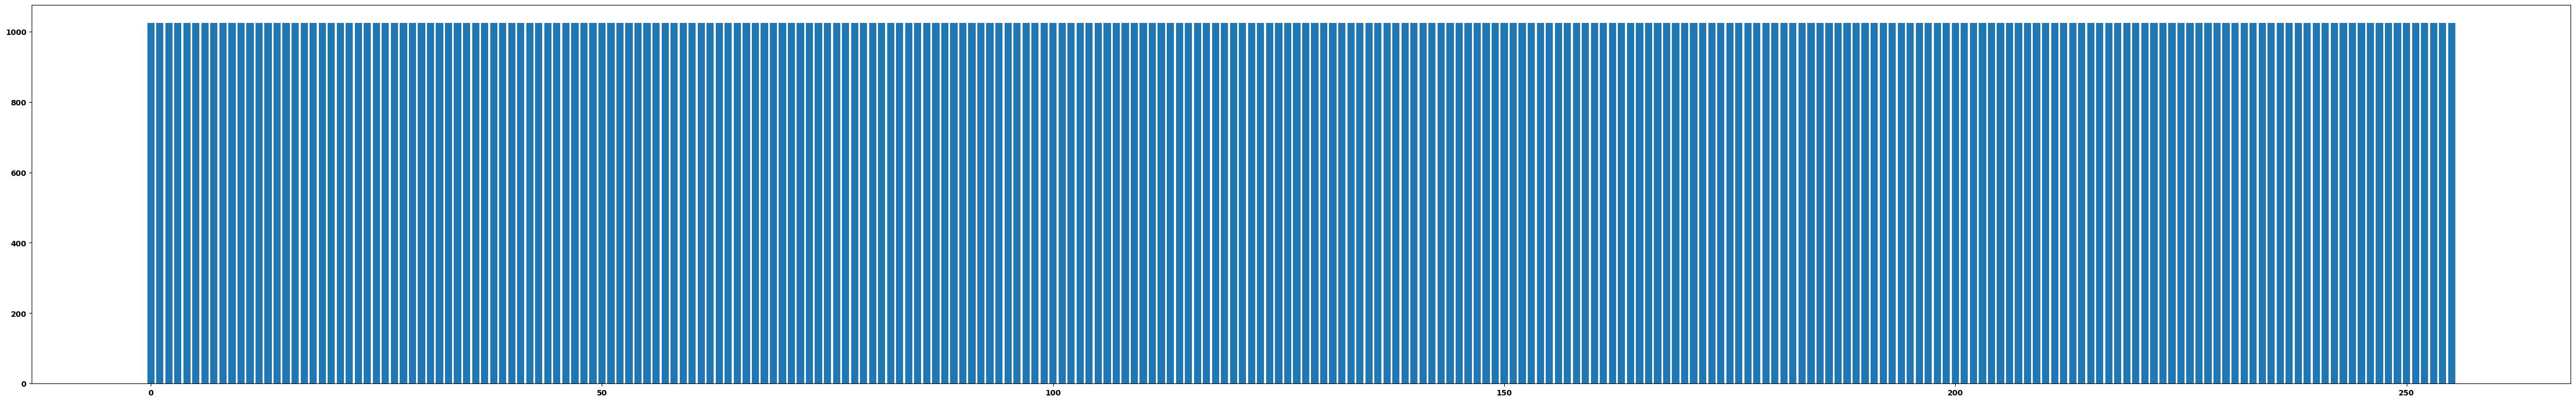

In [14]:
imhist(X2)

Una buena solución con la que me encontré en el libro Python: Real World Machine Learning es convertir nuestra imagen al espacio de color YUV, ecualizar el canal Y, y finalmente convertir el resultado a RGB. Así que la primera cosa que hacemos es convertir nuestra imagen a YUV. Esto puede hacerse usando el método cvtColor(), el cuál convierte la imagen de un espacio de color a otro, como sigue:

In [15]:
img = cv2.imread('pout.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
cv2.imwrite('result.jpg',hist_equalization_result)

True

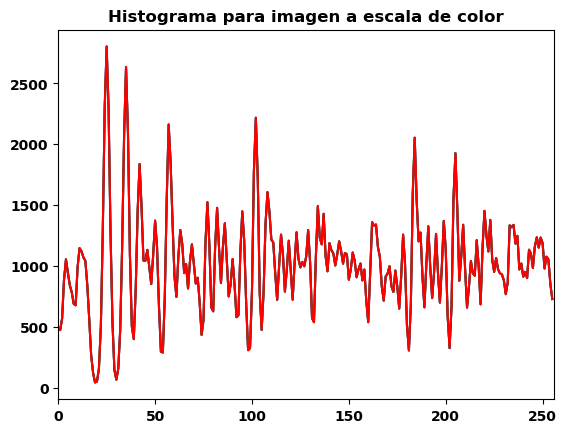

In [16]:
img_1 = cv2.imread('result.jpg')
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_1],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma para imagen a escala de color')
plt.show()

Ver implementación [from skratch](https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23)

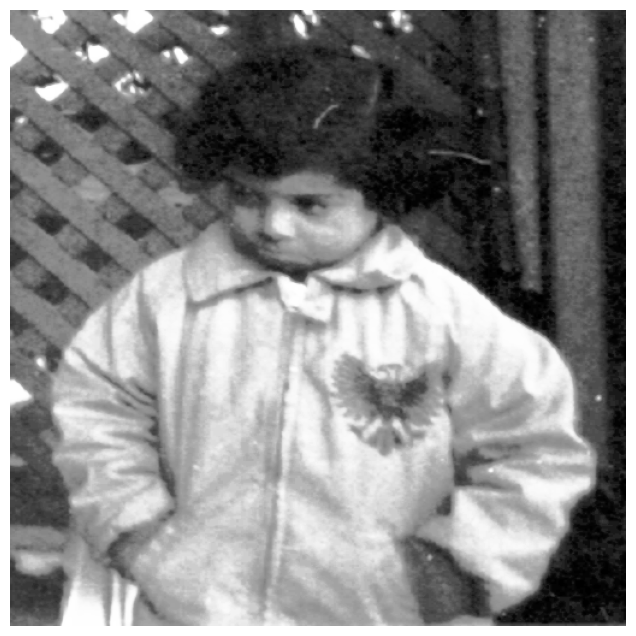

In [17]:
from cv2 import equalizeHist 
X3 = equalizeHist(X0)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X3,cmap='gray')

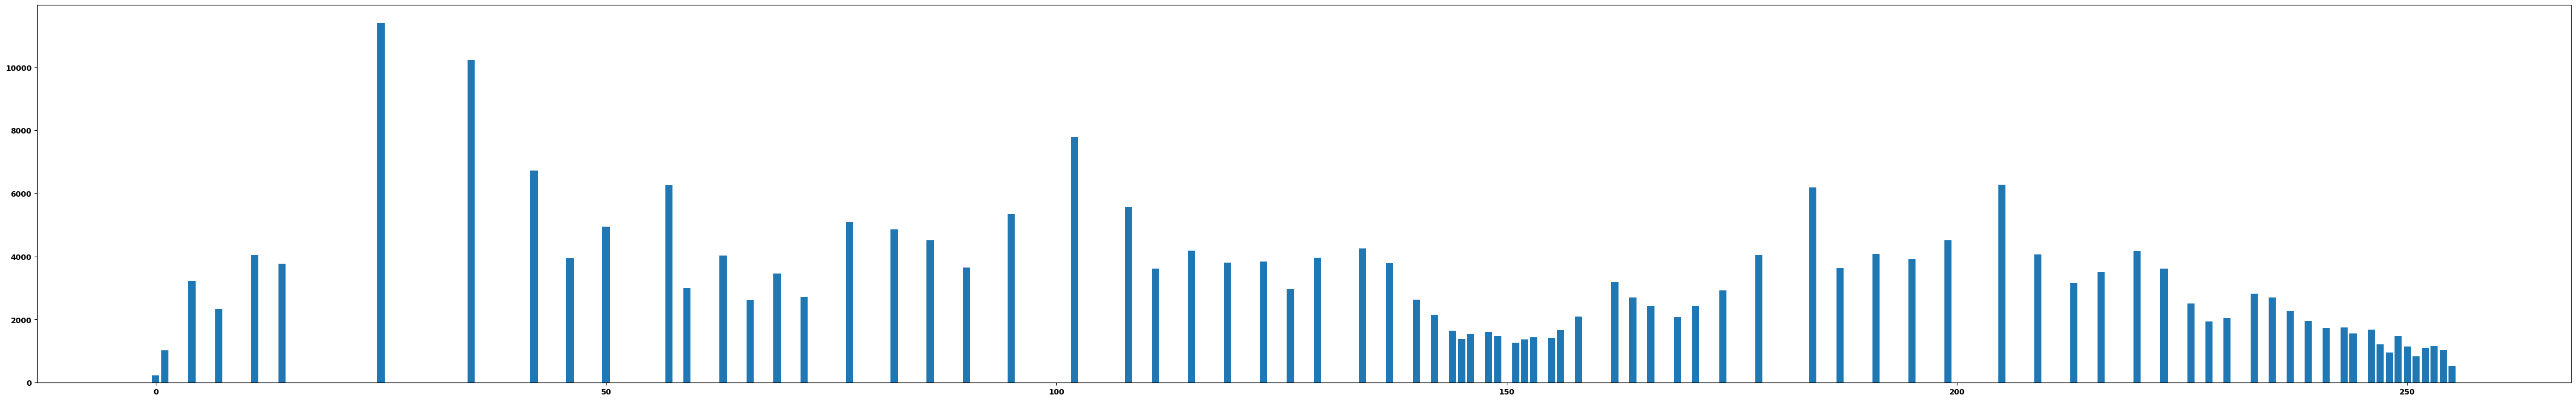

In [18]:
imhist(X3)

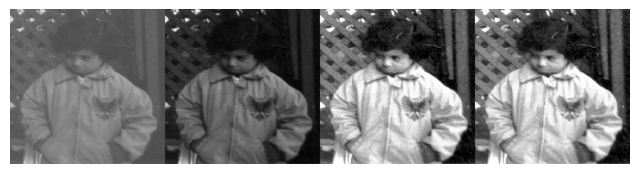

In [19]:
Y = np.hstack((X0,X1,X2,X3))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(Y,cmap='gray')
# original, expanded, uni-forced, not-uniforced

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).